In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('C:\\Users\\Pratik Asarkar\\GreatLearning\\Practice\\Machine Learning - Classification')

In [2]:
df = pd.read_csv('US_Heart_Patients.csv')
df = df.sample(frac = 1,random_state = 3)

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3546,0,54,1.0,0,0.0,0.0,0,0,0,241.0,106.0,77.0,27.64,78.0,74.0,0
1127,0,42,3.0,1,10.0,0.0,0,0,0,253.0,109.0,74.0,24.38,88.0,60.0,0
3088,0,58,1.0,0,0.0,1.0,1,1,0,274.0,159.0,90.0,28.40,72.0,81.0,0
437,1,45,1.0,1,30.0,0.0,0,0,0,240.0,141.0,89.0,25.01,95.0,76.0,0
3188,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0


In [4]:
df['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

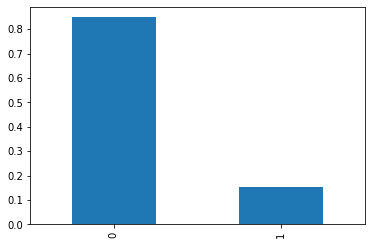

In [5]:
df['TenYearCHD'].value_counts(normalize = True).plot(kind = 'bar')

In [6]:
ms = df.isnull().sum()
ms[ms > 0]

education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64

In [7]:
df = df.fillna(method = 'ffill')

In [8]:
y = df['TenYearCHD']
X = df.drop('TenYearCHD',axis = 1)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 3)

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')

In [12]:
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,accuracy_score
def model_eval(algo,Xtrain,ytrain,Xtest,ytest):
    algo.fit(Xtrain,ytrain)
    y_train_ypred = algo.predict(Xtrain)
    y_train_prob = algo.predict_proba(Xtrain)[:,-1]

    print('Confusion matrix - Train : \n',confusion_matrix(ytrain,y_train_ypred))

    print('Overall accuracy : ',accuracy_score(ytrain,y_train_ypred))

    print('AUC - Train : ',roc_auc_score(ytrain,y_train_prob))
    print()

    #### TEST

    y_test_ypred = algo.predict(Xtest)
    y_test_prob = algo.predict_proba(Xtest)[:,-1]

    print('Confusion matrix - Test : \n',confusion_matrix(ytest,y_test_ypred))

    print('Overall accuracy - Test : ',accuracy_score(ytest,y_test_ypred))

    print('AUC - Test : ',roc_auc_score(ytest,y_test_prob))

    fpr,tpr,thresholds = roc_curve(ytest,y_test_prob)

    plt.plot(fpr,tpr)
    plt.plot(fpr,fpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

Confusion matrix - Train : 
 [[2520   13]
 [ 400   35]]
Overall accuracy :  0.8608490566037735
AUC - Train :  0.7314002296127894

Confusion matrix - Test : 
 [[1060    3]
 [ 200    9]]
Overall accuracy - Test :  0.8404088050314465
AUC - Test :  0.7003605395940892


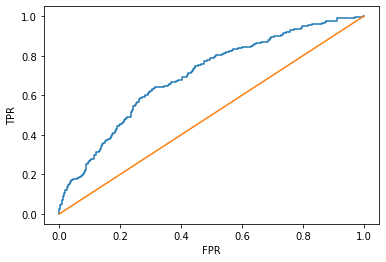

In [13]:
model_eval(lr,X_train,y_train,X_test,y_test)

### UNDERSAMPLING MAJORITY CLASS

In [14]:
Xy_train = pd.concat([X_train,y_train],axis = 1)

print('Before undersampling : \n',Xy_train['TenYearCHD'].value_counts())
print()

Xy_train_0 = Xy_train[Xy_train['TenYearCHD'] == 0]
Xy_train_1 = Xy_train[Xy_train['TenYearCHD'] == 1]

len_0 = len(Xy_train_0)
len_1 = len(Xy_train_1)

# Undersampling
Xy_train_0_us = Xy_train_0.sample(len_1,random_state = 3)

Xy_train_us = pd.concat([Xy_train_0_us,Xy_train_1])

print('After undersampling : \n',Xy_train_us['TenYearCHD'].value_counts())

y_train_us = Xy_train_us['TenYearCHD']
X_train_us = Xy_train_us.drop('TenYearCHD',axis = 1)

Before undersampling : 
 0    2533
1     435
Name: TenYearCHD, dtype: int64

After undersampling : 
 1    435
0    435
Name: TenYearCHD, dtype: int64


Confusion matrix - Train : 
 [[290 145]
 [137 298]]
Overall accuracy :  0.6758620689655173
AUC - Train :  0.7478398731668647

Confusion matrix - Test : 
 [[705 358]
 [ 75 134]]
Overall accuracy - Test :  0.6595911949685535
AUC - Test :  0.7070447006081011


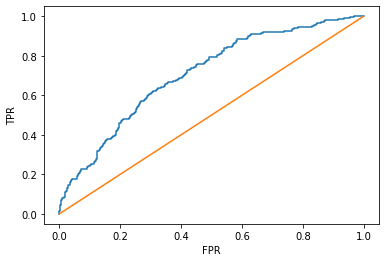

In [15]:
model_eval(lr,X_train_us,y_train_us,X_test,y_test)

### OVERSAMPLING MINORITY CLASS

In [16]:
Xy_train = pd.concat([X_train,y_train],axis = 1)

print('Before oversampling : \n',Xy_train['TenYearCHD'].value_counts())
print()

Xy_train_0 = Xy_train[Xy_train['TenYearCHD'] == 0]
Xy_train_1 = Xy_train[Xy_train['TenYearCHD'] == 1]

len_0 = len(Xy_train_0)
len_1 = len(Xy_train_1)

# OverSampling
Xy_train_1_os = Xy_train_1.sample(len_0,replace = True,random_state = 3)

Xy_train_os = pd.concat([Xy_train_1_os,Xy_train_0])

print('After oversampling : \n',Xy_train_os['TenYearCHD'].value_counts())

y_train_os = Xy_train_os['TenYearCHD']
X_train_os = Xy_train_os.drop('TenYearCHD',axis = 1)

Before oversampling : 
 0    2533
1     435
Name: TenYearCHD, dtype: int64

After oversampling : 
 1    2533
0    2533
Name: TenYearCHD, dtype: int64


Confusion matrix - Train : 
 [[1717  816]
 [ 797 1736]]
Overall accuracy :  0.6816028424792736
AUC - Train :  0.7351958490600738

Confusion matrix - Test : 
 [[719 344]
 [ 71 138]]
Overall accuracy - Test :  0.6737421383647799
AUC - Test :  0.7101414701553335


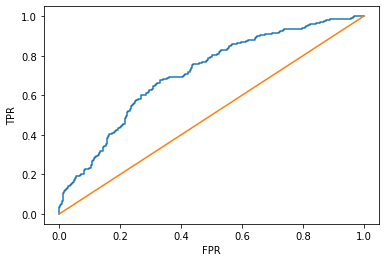

In [17]:
model_eval(lr,X_train_os,y_train_os,X_test,y_test)

In [18]:
# !pip install imblearn

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority',random_state = 3)

X_train_sm, y_train_sm = smote.fit_sample(X_train,y_train)

Confusion matrix - Train : 
 [[1724  809]
 [ 770 1763]]
Overall accuracy :  0.6883142518752468
AUC - Train :  0.7501404671911502

Confusion matrix - Test : 
 [[714 349]
 [ 97 112]]
Overall accuracy - Test :  0.64937106918239
AUC - Test :  0.6514243789581712


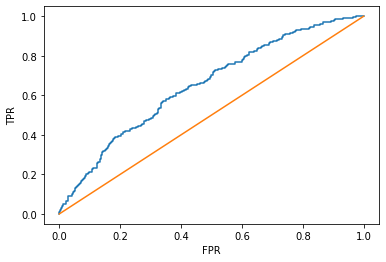

In [21]:
model_eval(lr,X_train_sm,y_train_sm,X_test,y_test)